<a href="https://colab.research.google.com/github/Davlatyot/Davlatyot/blob/main/CMM_reklamasi_foydasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Kerakli kutubxonalarni bog`lash iqtisodiy masalarni yechish uchun scipy va seaborn foydalanamiz.**


In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


#**2. Grafikni o`lchamlarini kiritamiz.**

In [42]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (20, 12)

#*** 3. Ma`lumotlar bazasini yulaymiz***  (ushbu ma'lumotlar bazasi internet magazenning daromatlari haqida ma'lumotlardan iborat.) 

In [47]:
cmm_reklam_df = pd.read_csv("/content/cmm_reklam.csv")
cmm_reklam_df.head()

,Oy,Giveaway,Telegram,Instagram,Foyda
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


jadvalimiz haqida ma'lumotlar.

In [48]:
cmm_reklam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oy         200 non-null    int64  
 1   Giveaway   200 non-null    float64
 2   Telegram   200 non-null    float64
 3   Instagram  200 non-null    float64
 4   Foyda      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# **4. Xususiyatlar va javoblar o'rtasidagi munosabatga grafik hosil qilamiz.**

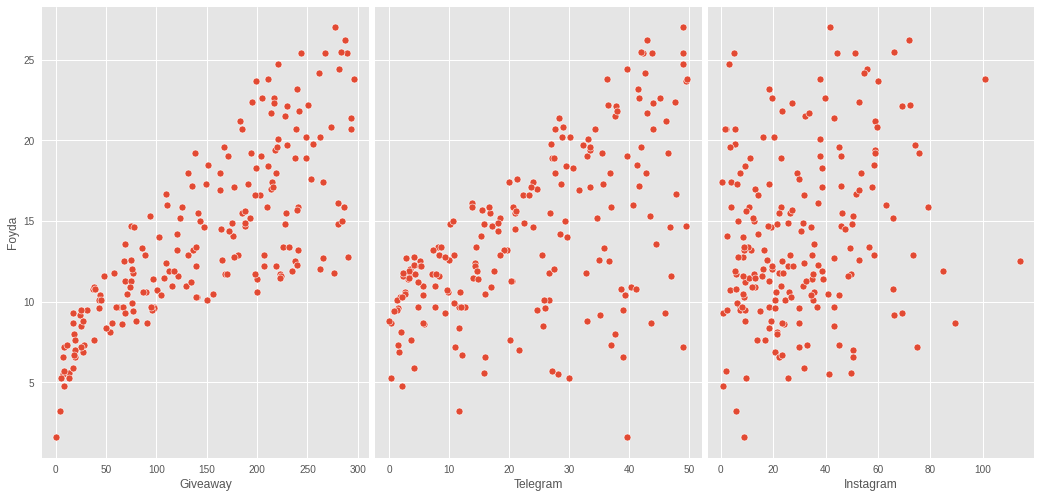

In [50]:
sns.pairplot(cmm_reklam_df, x_vars=["Giveaway", "Telegram", "Instagram"], y_vars='Foyda', height=7,aspect=0.7)

# 5. Ko'p chiziqli regressiya - koeffitsientlarni baholash 

In [74]:
#   scikit-learn ni import qilamiz #
from sklearn.linear_model import LinearRegression

# Xususiyat matritsasi yaratish #
features_list = ['Giveaway', 'Telegram', 'Instagram']
X = cmm_reklam_df[features_list]
#print(X)

# Maqsadli o'zgaruvchi - bu Foyda ustuni #
y = cmm_reklam_df['Foyda']

# LinearRegression misolini yaratamiz #
model1 = LinearRegression()
model1.fit(X,y)

# koeffitsientlarni chop qilamiz #
print(model1.intercept_)
print(model1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


xususiyat nomlarini koeffitsientlar bilan bog'lab olamiz va chop qilamiz

In [53]:
print(list(zip(features_list, model1.coef_)))

[('Giveaway', 0.0457646454553976), ('Telegram', 0.18853001691820448), ('Instagram', -0.0010374930424763285)]


"heatmap" ni hosil qilib olamiz

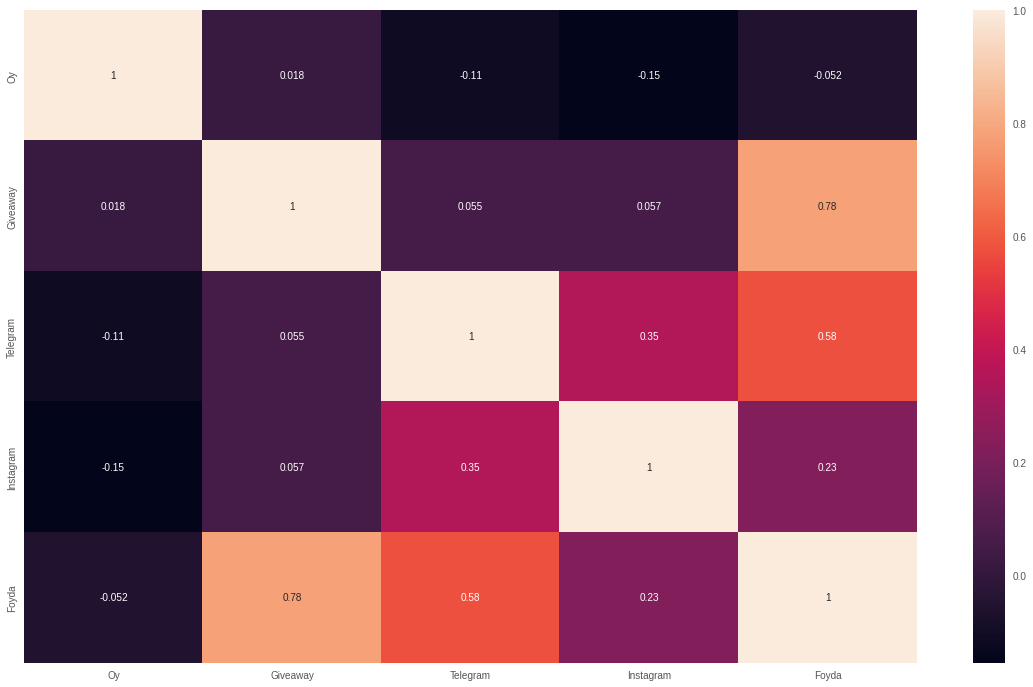

In [55]:
sns.heatmap(cmm_reklam_df.corr(), annot=True)

#6. "sklearn" kutubxonasidan foydalanib xususiyatlarni tanlab olamiz 

In [76]:
from sklearn.metrics import r2_score
model_2 = LinearRegression()
model_2.fit(X[['Giveaway', 'Telegram']],y)

# model bashorati #
model_2_pred = model_2.predict(X[['Giveaway', 'Telegram']])

R kvadratni aniqlab chop qilamiz

In [58]:
print("R2_Score : ", r2_score(y,model_2_pred))

R2_Score :  0.8971942610828957


In [77]:
model_3 = LinearRegression()
model_3.fit(X[['Giveaway', 'Telegram', 'Instagram']],y)

# model bashorati #
model_3_pred = model_3.predict(X[['Giveaway', 'Telegram', 'Instagram']])

In [78]:
print("R2_Score : ", r2_score(y,model_3_pred))

R2_Score :  0.8972106381789522


# 7  O'rgatish/Testlash bo‘linishi va ko‘rsatkichlar yordamida namunaviy baholash

**O'rtacha mutlaq xatolik  ** - xatolarning mutlaq qiymatining o'rtacha qiymati: 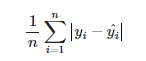

**O'rtacha kvadrat xatolik ** - kvadratik xatolarning o'rtacha qiymati: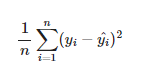

 ** O'rtacha kvadrat xatolik  Ildiz osti ** - kvadratik xatolarning o'rtacha qiymatini ildizdan chiqarilishi: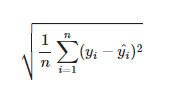

In [79]:
# Instagramni modelda saqlab quyamizda  RMSE bilan O'rgatish/Testlash bo'linishidan foydalanamizda #
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X= cmm_reklam_df[['Giveaway','Telegram', 'Instagram']]
y = cmm_reklam_df['Foyda']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

# Boshlang'ich o'rgatish uchun foydalanilgan ma'lumotlari bo'yicha trening modeli hosil qilamiz #
model_4 = LinearRegression()
model_4.fit(X_train,y_train)

# Test ma'lumotlari bo'yicha bashorat qilish uchun modeldan foydalanish #
model_4_pred = model_4.predict(X_test)

In [80]:
print("RMSE qiymati :  ", np.sqrt(mean_squared_error(y_test,model_4_pred)))
print("R2_Score : ", r2_score(y_test,model_4_pred))

RMSE value :   1.404651423032895
R2_Score :  0.9156213613792232


In [66]:
X= cmm_reklam_df[['Giveaway','Telegram', 'Instagram']]
y = cmm_reklam_df['Foyda']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

# Training Model on training data #
model_5 = LinearRegression()
model_5.fit(X_train,y_train)

# Using model to make predictions on test data #
model_5_pred = model_5.predict(X_test)

In [81]:
print("RMSE qiymati :  ", np.sqrt(mean_squared_error(y_test,model_5_pred)))
print("R2_Score qiymati :  ", r2_score(y_test,model_5_pred))

RMSE qiymati :   1.404651423032895
R2_Score qiymati :   0.9156213613792232


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


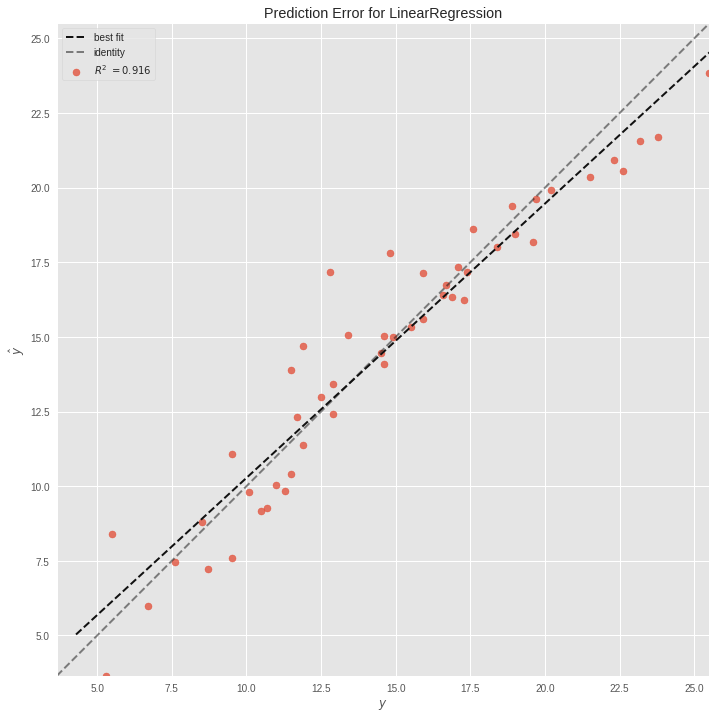

In [82]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(model_5)

visualizer.fit(X_train, y_train)  # O'rgatish uchun  ma'lumotlarini vizualizatorga moslang
visualizer.score(X_test, y_test)  # Sinov ma'lumotlari bo'yicha modelni baholang
visualizer.poof() 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


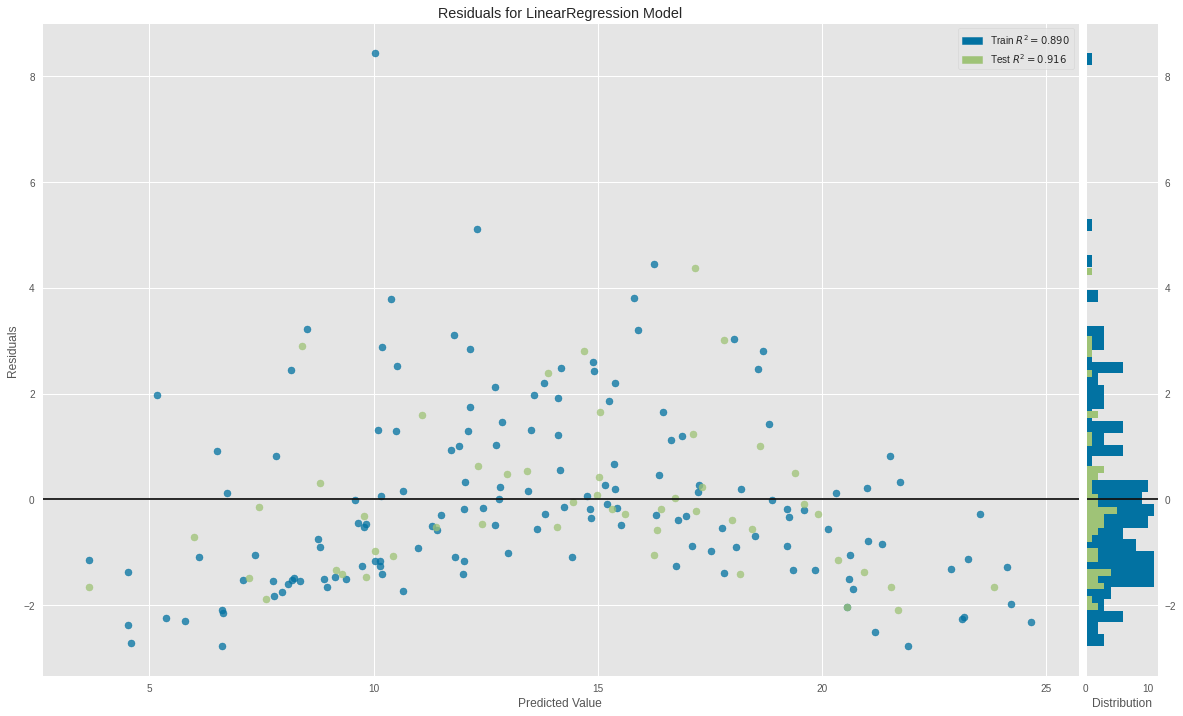

In [83]:
visualizer = ResidualsPlot(model_5)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# 8 Oʻzaro taʼsir (Sinergiya)

In [84]:
# Dataframemizda o'zaro ta'sir ustunini yarataylik #

cmm_reklam_df['Interaction'] = cmm_reklam_df['Giveaway'] * cmm_reklam_df['Telegram']

# O'zaro ta'sir ustunini xususiyat matritsasiga qo'shing #

X= cmm_reklam_df[['Giveaway','Telegram', 'Instagram']]
y = cmm_reklam_df['Foyda']

X_train,X_test,Y_train,Y_test =  train_test_split(X,y, random_state=1)
model_6 = LinearRegression()
model_6.fit(X_train,Y_train)

model_6_pred = model_6.predict(X_test)

# RMSE va R2_Scoreni hisoblash #

print("RMSE : ", np.sqrt(mean_squared_error(y_test,model_6_pred)))
print("R2_Score : ", r2_score(y_test,model_6_pred))

RMSE :  1.404651423032895
R2_Score :  0.9156213613792232


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


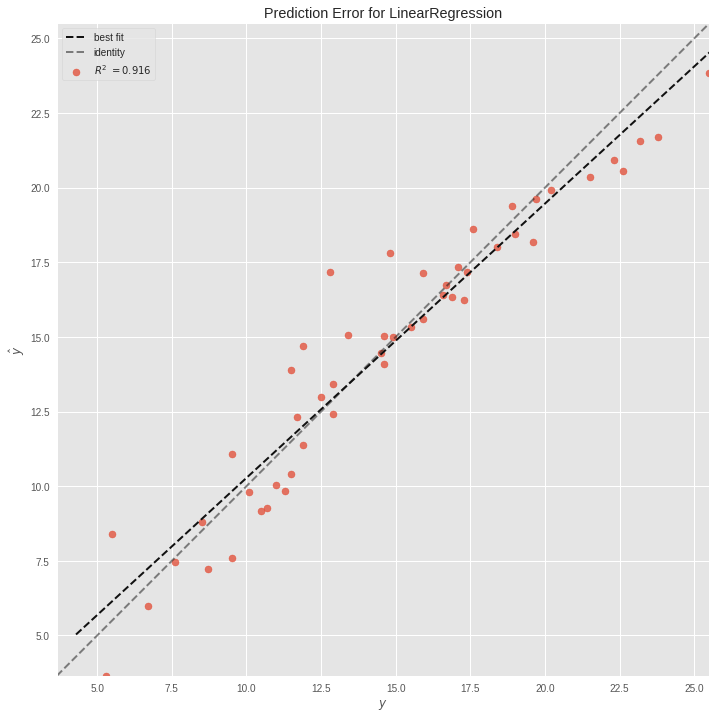

In [85]:
visualizer = PredictionError(model_6)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.poof() 